In [187]:
import pandas as pd
import string
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
def load_data():

    data = pd.read_csv('D:\##Widya\DSC_Gold_Challenge\data.csv', encoding='iso-8859-1')
    return data

tweet_df = load_data()

In [98]:
tweet_df.shape

(13169, 13)

In [104]:
df = pd.DataFrame(tweet_df[['Tweet','HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']])

In [105]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
df.shape

(13169, 13)

In [102]:
df.isnull().sum()

HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [107]:
df.duplicated().sum()

125

In [108]:
df=df.drop_duplicates()

In [110]:
df_temp= pd.DataFrame(df[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']])

In [121]:
df_temp

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0
13165,0,1,0,0,0,0,0,0,0,0,0,0
13166,0,0,0,0,0,0,0,0,0,0,0,0
13167,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
df_temp.shape

(13044, 12)

In [112]:
df_temp.mean()

HS               0.423030
Abusive          0.383701
HS_Individual    0.271389
HS_Group         0.151641
HS_Religion      0.060488
HS_Race          0.043162
HS_Physical      0.024686
HS_Gender        0.023306
HS_Other         0.284115
HS_Weak          0.256670
HS_Moderate      0.130175
HS_Strong        0.036185
dtype: float64

In [113]:
df_temp.median()

HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [114]:
df_temp.sum()

HS               5518
Abusive          5005
HS_Individual    3540
HS_Group         1978
HS_Religion       789
HS_Race           563
HS_Physical       322
HS_Gender         304
HS_Other         3706
HS_Weak          3348
HS_Moderate      1698
HS_Strong         472
dtype: int64

In [71]:
df.skew()

HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
dtype: float64

In [122]:
df_temp2 = df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
df_temp2

C:\Users\depri\AppData\Local\Temp\ipykernel_11196\171092024.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp2 = df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13040,0,1,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,0,0
13042,0,0,0,0,0,0,0,0,0,0,0,0
13043,1,1,1,0,0,0,0,0,1,1,0,0


In [125]:
df_count = df_temp2
df_count = df_count.drop(labels=13044, axis=0)
df_count

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13039,1,1,1,0,0,0,1,0,0,1,0,0
13040,0,1,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,0,0
13042,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
df_count.drop(df_count.columns[[2, 3, 4,5,6,7,8,9,10,11]], axis=1, inplace=True)
df_count

,HS,Abusive
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
13039,1,1
13040,0,1
13041,0,0
13042,0,0


In [128]:
conditions = [

    (df_count['HS'] == 0) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 1) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 1)
    ]

conditions2 = [
    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    ]

conditions3 = [

    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 0 ) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 0)
    ]

conditions4 = [

    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 1) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 0)
    ]
# create a list of the values we want to assign for each condition
values = [1, 0, 0]
values2 = [1]
values3 = [0,1,0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_count['Non'] = np.select(conditions, values)
df_count['Both'] = np.select(conditions2, values2)
df_count['Abuse'] = np.select(conditions3, values3)
df_count['Hate Speech'] = np.select(conditions4, values3)
df_count.head()


,HS,Abusive,Non,Both,Abuse,Hate Speech
0,1,1,0,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,1,0,1,0,0


In [129]:
df_count.sum()

HS             5518
Abusive        5005
Non            5783
Both           3262
Abuse          1743
Hate Speech    2256
dtype: int64

In [130]:
df_count.drop(df_count.columns[[0,1]], axis=1, inplace=True)
df_count

,Non,Both,Abuse,Hate Speech
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
13039,0,1,0,0
13040,0,0,1,0
13041,1,0,0,0
13042,1,0,0,0


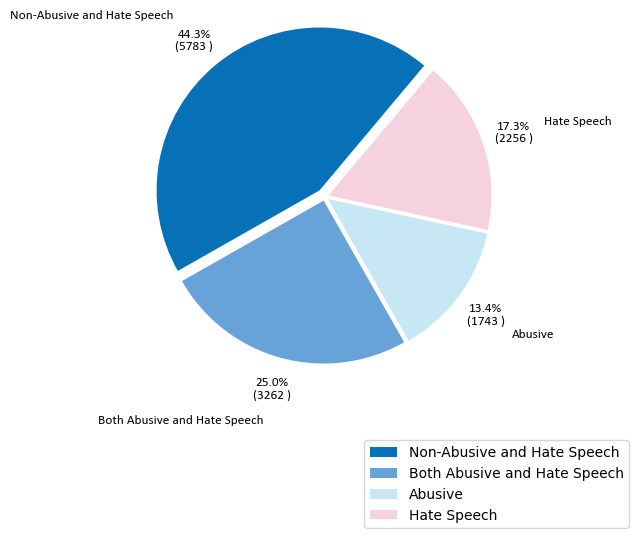

In [147]:
data = [5783, 3262, 1743, 2256]
keys = ['Non-Abusive and Hate Speech', 'Both Abusive and Hate Speech', 'Abusive', 'Hate Speech']

plt.pie(data, explode=[0.1,0.05,0.05,0.05], labels = keys,pctdistance = 1.2, 
        labeldistance = 1.4,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(data):.0f} )',
        textprops={"family":"Calibri","size": 9.5},
        radius = 2,
        colors = ["#0671B7", "#67A3D9", "#C8E7F5", "#F6D2E0",],
         shadow=False,startangle=50)
plt.axis('equal')
plt.legend(title='',bbox_to_anchor=(1,0), loc="upper right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()



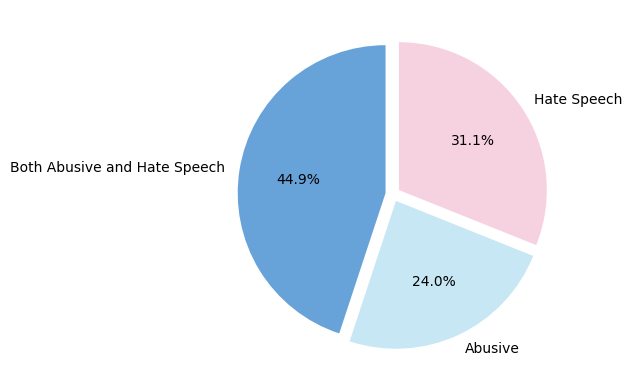

In [170]:
data3 = [3262, 1743, 2256]
keys3 = ['Both Abusive and Hate Speech', 'Abusive', 'Hate Speech']

color_palette_list = ["#67A3D9", "#C8E7F5", "#F6D2E0"]

# plotting data on chart
plt.pie(data3, labels=keys3,startangle=90, colors=color_palette_list,shadow = False, autopct='%.1f%%',explode=(0.05,0.05,0.05))
  
# displaying chart
plt.show()

In [148]:
conditions = [

    (df_count['Hate Speech'] == 1) | (df_count['Abuse'] == 1),
    (df_count['Both'] == 1)
    ]
values = [1, 1]

conditions2 = [

    (df_count['Non'] == 1)
    ]
values2 = [1]
df_count['Negatif'] = np.select(conditions, values)
df_count['Positif'] = np.select(conditions2, values2)
df_count.head(15)

,Non,Both,Abuse,Hate Speech,Negatif,Positif
0,0,1,0,0,1,0
1,0,0,1,0,1,0
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,0,1,0,0,1,0
5,0,1,0,0,1,0
6,1,0,0,0,0,1
7,0,0,1,0,1,0
8,1,0,0,0,0,1
9,0,0,1,0,1,0


In [150]:
df_count.sum()

Non            5783
Both           3262
Abuse          1743
Hate Speech    2256
Negatif        7261
Positif        5783
dtype: int64

In [151]:
df_count.describe()

,Non,Both,Abuse,Hate Speech,Negatif,Positif
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.443346,0.250077,0.133625,0.172953,0.556654,0.443346
std,0.496799,0.433074,0.340262,0.378221,0.496799,0.496799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


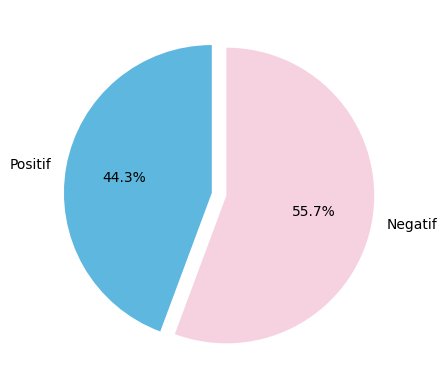

In [163]:
data2 = [5783, 7261]
keys2 = ['Positif','Negatif']

color_palette_list = ['#5DB7DE', "#F6D2E0"]

# plotting data on chart
plt.pie(data2, labels=keys2,startangle=90, colors=color_palette_list,shadow = False, autopct='%.1f%%',explode=(0.05,0.05))
  
# displaying chart
plt.show()

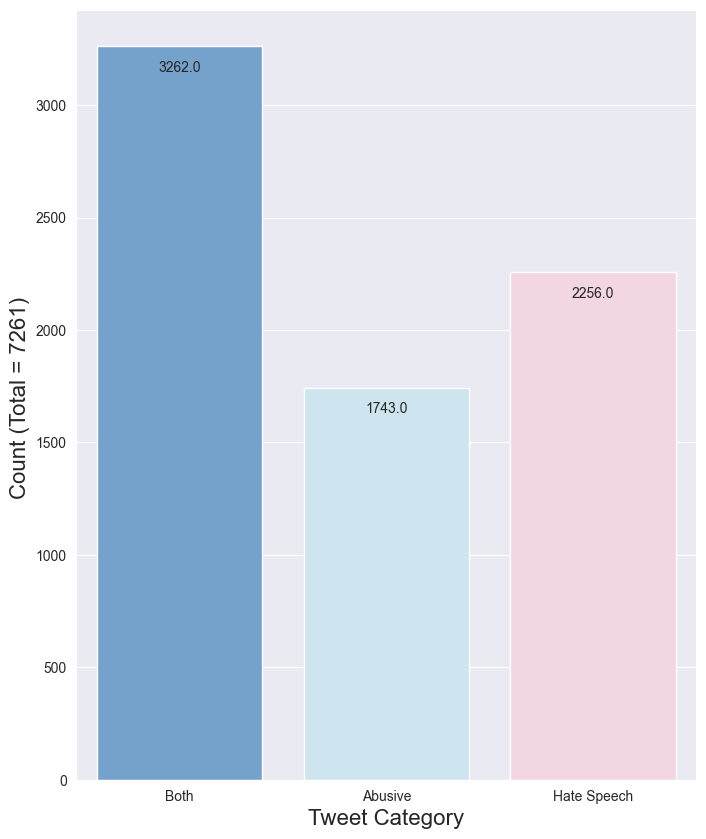

In [198]:
sns.set_style('darkgrid')

data4 = [3262, 1743, 2256]
keys4 = ['Both', 'Abusive', 'Hate Speech']
my_color = ["#67A3D9", "#C8E7F5", "#F6D2E0"]

plt.figure(figsize = (8, 10))

splot = sns.barplot(y=data4, x=keys4, palette = color)

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -15),
                   textcoords = 'offset points')

plt.xlabel("Tweet Category", size = 16)
plt.ylabel("Count (Total = 7261) ", size = 16)


plt.show()

In [61]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.sum()

Tweet          - disaat semua cowok berusaha melacak perhatia...
Abusive                                                     5043
HS_Religion                                                  793
HS_Race                                                      566
HS_Physical                                                  323
HS_Gender                                                    306
dtype: object

In [205]:
def remove_pattern(tweet, pattern):
   r = re.findall(pattern, tweet)
   for i in r :
      tweet = re.sub(i,'', tweet)
   return tweet
df['remove_user'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

C:\Users\depri\AppData\Local\Temp\ipykernel_11196\2367280245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remove_user'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")


In [206]:
def lower(s):
    s.lower

def clean(s):
    #Remove USER, RT, RETWEET, URL, http, https
    s = re.sub('user|rt|retweet|url|http|https',' ', s.lower)
    #Remove text berawalan angka
    s = re.sub('(\d{1,})', ' ', s)
    #Remove emoji
    s = re.sub(r'\\x[a-z0-9]+', ' ', s)
    #Clean non alfanumerik except space,!,?
    s = re.sub('[^a-z0-9\s\!\?]+', ' ', s)
    #Remove enter (\n)
    s = re.sub(r'\n',' ', s)
    #Remove spasi lebih dari 1
    s = re.sub('\s\s+', ' ', s)
    
    return s

df['clean_text'] = df['remove_user'].apply(lambda x: clean(x)) 

TypeError: expected string or bytes-like object

In [23]:
division = ['Sentiment of Abusive','Sentiment of Religion','Sentiment of Race','Positif Sentiment','Sentiment of Physical','Sentiment of Gender']
division_percentage_mark = [5043,793,566,6138,323,306]
Explode =[0,0,0.1,0,0,0]

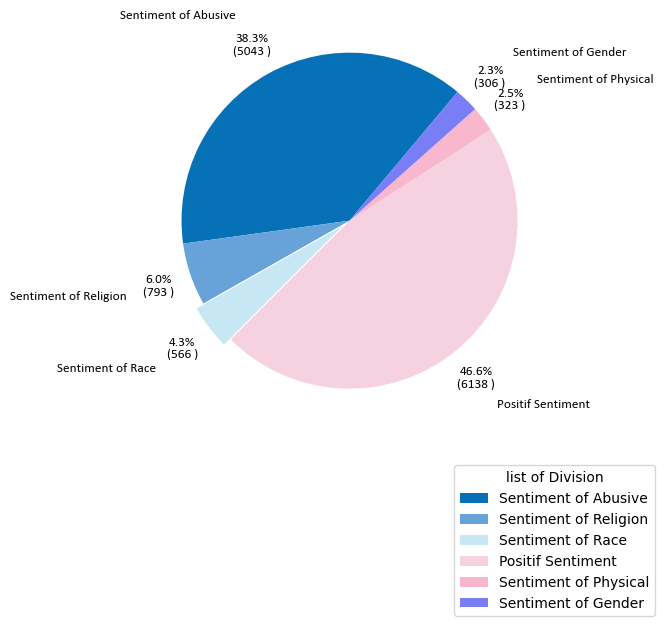

In [30]:
plt.pie(division_percentage_mark, explode=[0,0,0.1,0,0,0], labels = division,pctdistance = 1.2, 
        labeldistance = 1.4,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(division_percentage_mark):.0f} )',
        textprops={"family":"Calibri","size": 9.5},
        radius = 2,
        colors = ["#0671B7", "#67A3D9", "#C8E7F5", "#F6D2E0", "#F8B7CD", "#797EF6", "#A4"],
         shadow=False,startangle=50)
plt.axis('equal')
plt.legend(title='list of Division',bbox_to_anchor=(1,0), loc="upper right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

<AxesSubplot: ylabel='Count'>

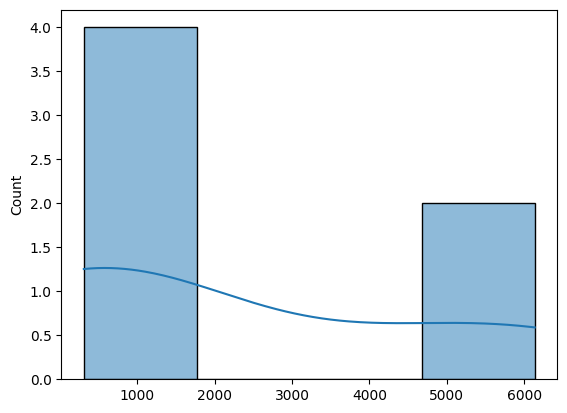

In [31]:
sns.histplot(data=division_percentage_mark, kde=True)

In [52]:
df.info

<bound method DataFrame.info of                                                    Tweet  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...        0   
4      USER USER Kaum cebong kapir udah keliatan dong...        1   
...                                                  ...      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...        1   
13165                       USER Kasur mana enak kunyuk'        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...        0   
13167  USER USER USER USER Bom yang real mudah terdet...        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...        1   

       HS_Religion  HS_Race  HS_Physical  HS_Gender  tweet_df  \
0                0        0            0          0  tweet_df   
1        

In [42]:
df['tweet_df']='tweet_df'

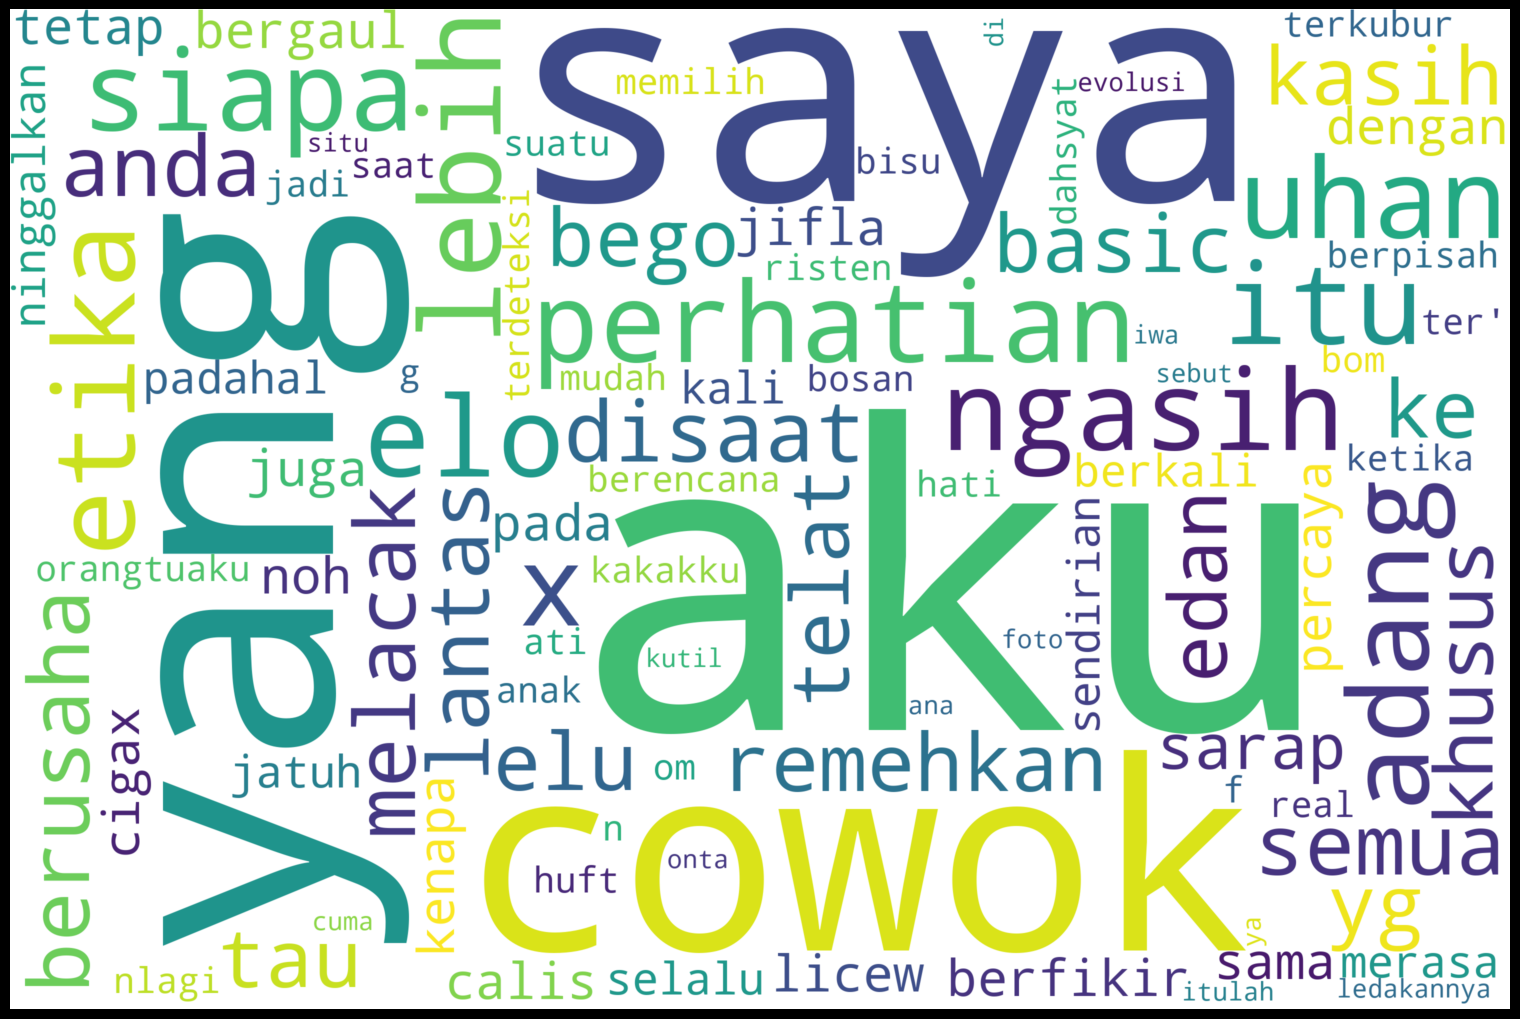

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

text = df['clean_text'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

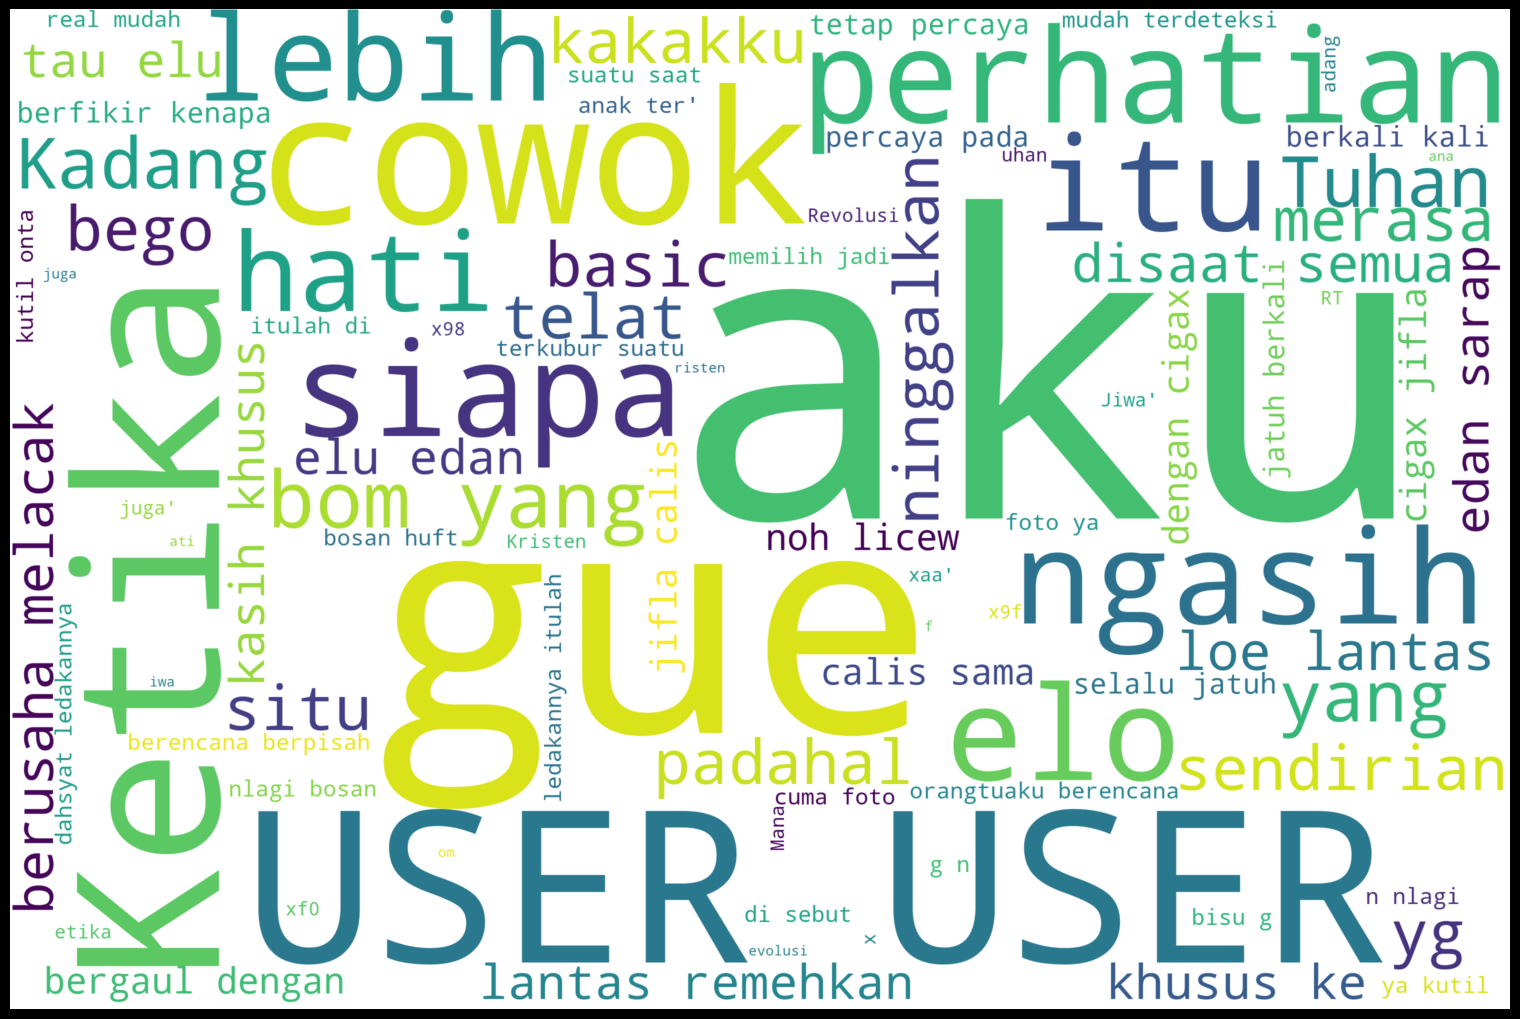

In [207]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

text = df.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()